In [4]:
from utils import utils, dataset, models
from sklearn.preprocessing import MinMaxScaler
from config import *

In [16]:
epochs = 100
batch_size = 64
lr = 1e-3

In [7]:
def get_model(inshape: int, lr=lr):
    print("Get model for", dataset.get_dataset_path())
 
    # model = models.model_test(lr=lr,inshape=inshape,nclass=dataset.get_model_outshape())
    model = models.model_conv1D(lr=lr,N=64,inshape=inshape,nclass=dataset.get_model_outshape())
    # model = models.model_test(lr=lr,inshape=inshape,nclass=dataset.get_model_outshape())
    # model = models.model_dense(lr=lr,N=64,inshape=inshape,nclass=dataset.get_model_outshape())
    # model = models.model_lstm(lr=lr,N=64,inshape=inshape,nclass=dataset.get_model_outshape())
    # model = models.model_conv1D_large(lr=lr,nfeat=inshape,nclass=dataset.get_model_outshape())
    # model = models.model_conv1D_binary(lr=lr,nfeat=inshape,nclass=dataset.get_model_outshape())
    return model



In [10]:
dataset.change_dataset('ToN_IoT_50-50')

Dataset:  ToN_IoT_50-50


In [13]:
x_train, y_train = dataset.get_dataset(df=dataset.load_dataset_train())
x_val, y_val = dataset.get_dataset(df=dataset.load_dataset_validate())
x_test, y_test = dataset.get_dataset(df=dataset.load_dataset_test())



scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)


class_weights = utils.calc_class_weights(y_train)


y_train = utils.label_to_categorical(y_train)
y_val = utils.label_to_categorical(y_val)
y_test = utils.label_to_categorical(y_test)


h:\Learning\DACN\NIDS-FedML\src\utils\dataset.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.replace([np.inf, -np.inf], np.nan, inplace=True)
h:\Learning\DACN\NIDS-FedML\src\utils\dataset.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.replace([np.inf, -np.inf], np.nan, inplace=True)
h:\Learning\DACN\NIDS-FedML\src\utils\dataset.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.replace([np.inf, -np.inf], np.nan, inp

In [14]:
model = utils.get_model(inshape=x_train.shape[1])

Get model for ./dataset/ToN_IoT_50-50/


In [17]:
history = model.fit(
    x_train,
    y_train,
    shuffle=True,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val),
    class_weight=class_weights,
    workers=3
)

2309/2309 [==============================] - 6s 3ms/step - loss: 0.5276 - acc: 0.8207 - f1_score: 0.7630 - precision: 0.8709 - recall: 0.7974 - val_loss: 0.4681 - val_acc: 0.8189 - val_f1_score: 0.7639 - val_precision: 0.8568 - val_recall: 0.7986


In [18]:
loss, accuracy, f1, prec, recall  = model.evaluate(x_test, y_test, batch_size)
result = {"accuracy" : accuracy}
result, details = utils.get_model_result(model, x_test, y_test, batch_size)

495/495 [==============================] - 0s 699us/step
normal : f1 = 0.9294885589269063, precision = 0.9924938725490197, recall = 0.874005126129772 
backdoor : f1 = 0.9676678155260134, precision = 0.9439641370477105, recall = 0.9925925925925926 
ddos : f1 = 0.7732592739535806, precision = 0.9586817511067388, recall = 0.647938829787234 
dos : f1 = 0.9575928206932958, precision = 0.9992655159750276, recall = 0.9192567567567568 
injection : f1 = 0.6404815650865312, precision = 0.5950782997762863, recall = 0.693385467579016 
password : f1 = 0.6022749180643917, precision = 0.7178308823529411, recall = 0.5187645300564596 
ransomware : f1 = 0.941156049296997, precision = 0.9620298083747338, recall = 0.9211688752973156 
scanning : f1 = 0.8941138316847738, precision = 0.8882087628865979, recall = 0.9000979431929481 
xss : f1 = 0.8468135194215571, precision = 0.870376771517456, recall = 0.8244924688932548 
mitm : f1 = 0.10951210951210952, precision = 0.05814386880357809, recall = 0.93975903614

495/495 [==============================] - 0s 736us/step


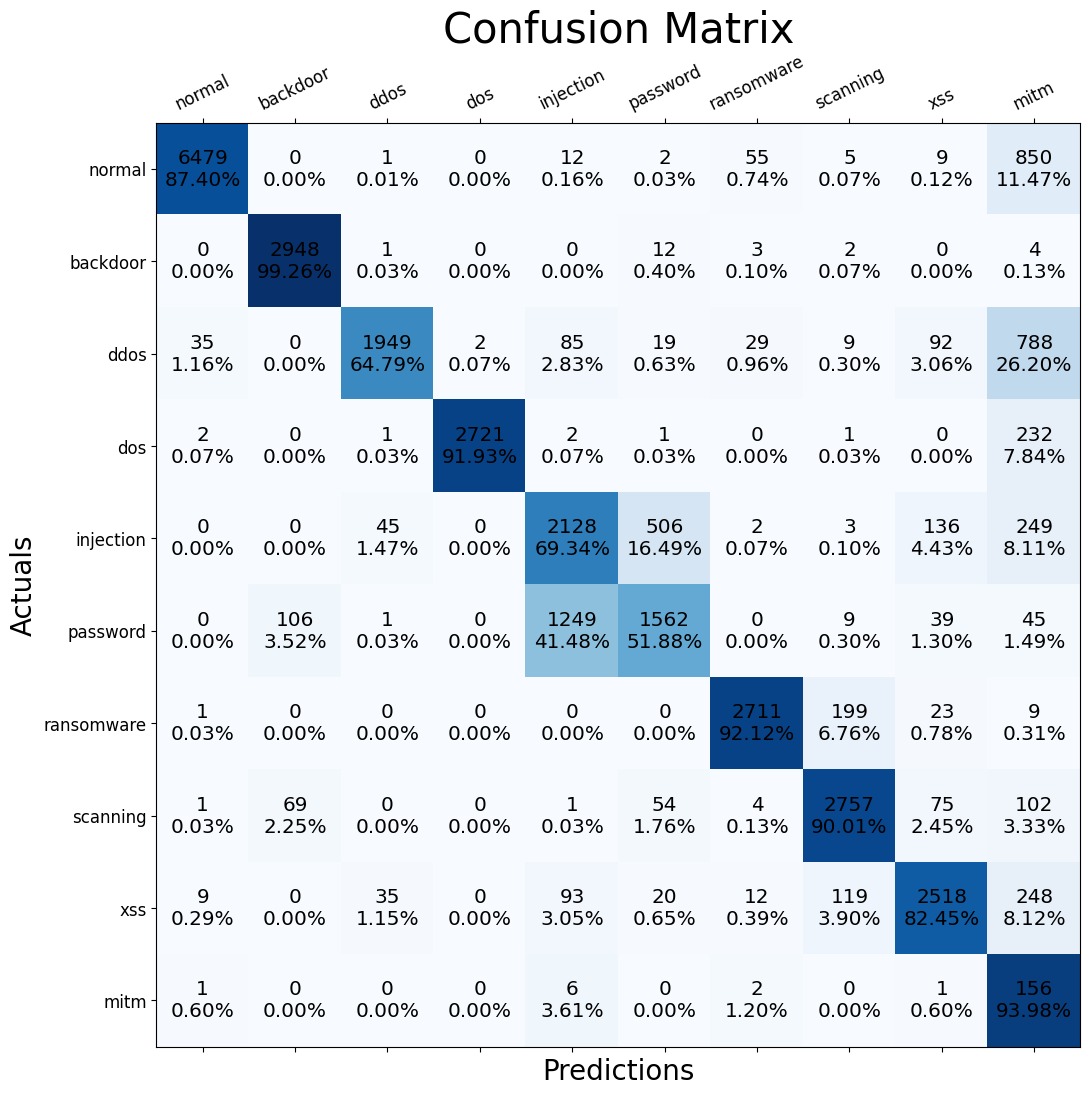

In [19]:
utils.plot_confussion_matrix(model, x_test, y_test, BATCH_SIZE, f'centralize-confussion_matrix.png')

495/495 [==============================] - 0s 717us/step


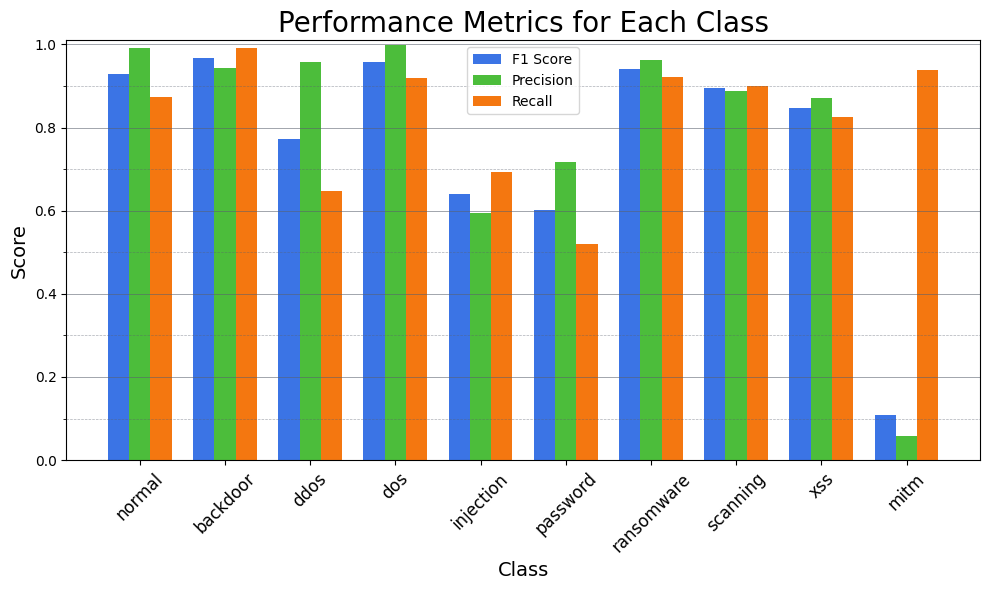

In [20]:
utils.plot_model_result(model, x_test, y_test, BATCH_SIZE, f'centralize-metrics.png')